# Линейная регрессия

Линейная регрессия - самый простой инструмент выявления зависимости между различными числовыми признакми. Часто линейную регрессию относят к методам машинного обучения, однако на самом деле - это не так. Восстановить линейную ргрессию - то есть линейную зависимость между различными числовыми данными - можно с помощью аналитического решения. Тем не менее, так как линейная ргрессия решает ту же задачу, что и машинное обучение - задачу восстановления зависимости между данными - для регрессии применяются те же термины и понятия, что и для машинного обучения. 

Примеры задач регресии:
- Оценка стоимости недвижимости: по характеристике
района, экологической обстановке, транспортной
связности оценить стоимость жилья
- Прогноз свойств соединений: по параметрам
химических элементов спрогнозировать температуру
плавления, электропроводность, теплоемкость
получаемого соединения
- Медицина: по постоперационным показателям оценить
время заживления органа
- Кредитный скоринг: по анкете заемщика оценить
величину кредитного лимита
- Инженерное дело: по техническим характеристикам
автомобиля и режиму езды спрогнозировать расход
топлива

**Ответ в задачах регресии является числовым из непрерывного диапазона, в отличии от задач классификации, где ответ дискретный.**

## Теоретические основания

### Базовые понятия, используемые в машинном обучении

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых планируется строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x_{i}, y_{i})^l_{i=1}.$$

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, позволяющая делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

Отметим, что $ x_{i} = (x^{1}, x^{2}, ..., x^{d}) $. То есть каждый объект $x_{i}$ состоит из ряда различных значений. 

### Линейная регрессия

#### Линейная модель

Для начала введём проствую базовую линейную модель, записанную следующим образом:

$$a(x) = w_{0} + w_{1}x^{1} + ... + w_{d}x^{d} = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$

Параметрами модели $a(x)$ являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_, _сдвигом_ или _смещением_. Оптимизация модели заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:
 
$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$
 
Чтобы сделать модель однородной и упростить оптимизацию вводится фиктивный признак $x^{0}$ всегда равный единице. Таким образом: 

$$a(x) = \left \langle w,x \right \rangle = \sum^{d}_{i=0}w_{i}x^{i} $$

#### Функционал ошибки

Для обучения модели и сравнения различных моделей между собой необходимо разработать математическую формулу и алгоритм расчёта ошибки модели. В рамках решения задачи оптимизации обычно ставится задача достижения минимального значения функционала ошибки. 

В качестве очевидного решения можно предложить такую формулу:
$Q(a,y)=a(x)-y$. Однако, у неё есть принципиальная проблема: у такой функции не существует минимума. 

С учётом этого, логичным кажется решение использовать в качестве функции для расчёта ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = MAE = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, мы уже разбирали, что функционал ошибки или функция потерь, должны быть дифференцируемы, а значит, необходимо предложить другой вариант базовой функции для расчёта ошибки: $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = MSE = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

#### Вывод аналитической формулы для решения линейной регрессии 

Таким образом, задача расчёт оптимальных коэффициентов математически может быть записана следующим образом.

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Если вас смущает возникшая, казалось бы путаница, между различными записями, то целесообразно ввести матричную запись признаков:

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\ 
... & ... & ...\\ 
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

$$y = \begin{pmatrix}
y_{1}\\ 
...\\ 
y_{l}
\end{pmatrix}.$$

Таким образом, задача начинает выглядеть следующим образом

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

Взяв производную (от матрицы (!)) и прировняв её к нулю (точка экструма квадратинчной функции) можно получить значения коэффициентов:

$$w = (X^{T}X)^{-1}X^{T}y.$$

Если вам интересна более детальная математическая подоплёка смотрите её тут: [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)

**Таким образом, нетрудно догадаться, что в идеальном случае MAE и MSE будут равны 0.**

Коэффициент детерминации $R2$, или $R-квадрат$, варьируется в интервале между 0 и 1 и обозначает объяснительную мощность линейной регрессионной модели. Он вычисляет объясненную долю изменчивости в зависимой переменной. (или если по-простому, $R2$ показывают насколько признаки влияют/коррелируют с ответом.

Обычно, чем ближе $R2$ к 1, тем лучше линия регрессии подогнана к точкам данных и больше изменчивости в $Y$ объясняется независимой переменной $X$. 

## Пример самой простой линейной регрессии

Предположим, нам задан набор из 7 точек (таблица ниже).

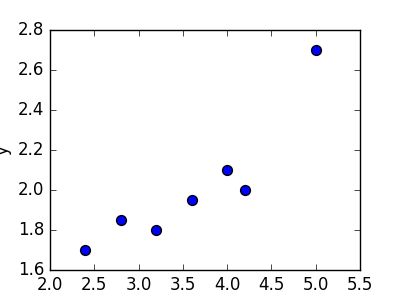

**Цель линейной регрессии** — поиск линии, которая наилучшим образом соответствует этим точкам. 

Общее уравнение для прямой (в том случае если у нас один признак для каждого объекта) $\\ f (x) = w_1*x + w_0 $,  где $\\ w_1 $ — наклон линии, а $\\ w_0 $ — его y-сдвиг. Таким образом, решение линейной регрессии определяет значения для $\\ w_1 $ и $\\ w_0 $, так что f (x) приближается как можно ближе к y. 

Попробуем несколько случайных кандидатов:

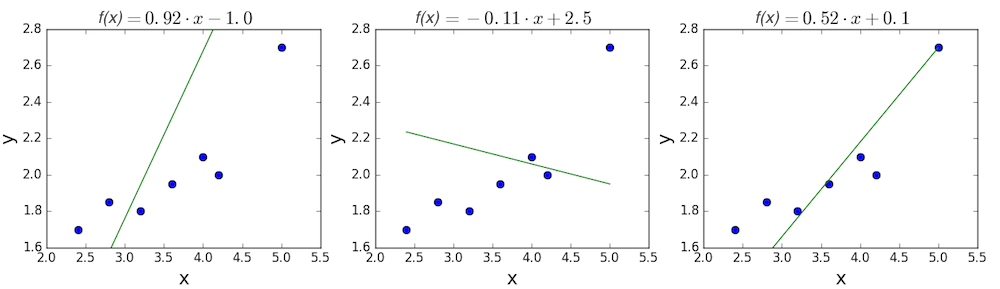

**Как расчитываются метрики**

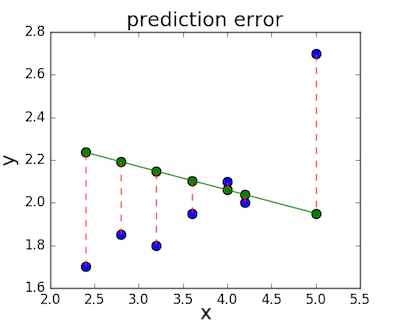

- зеленые точки - это $\\ \bar{y_t}$ - предсказание
- синие точки - это $\\ y_t $ - правильный ответ
- T = 7 - это общее число наблюдений (точек).

Вычислим MSE для каждой из трех функций выше: 
- первая функция дает **MSE = 0,17**
- вторая **MSE = 0,08**
- третья **MSE = 0,02**

Неудивительно, что третья функция имеет самую низкую MSE, подтверждая нашу догадку, что это линия наилучшего соответствия.
В идеальном случае, когда все ответы предсказаны точно, MSE будет равна **нулю**. 

## Практика

Построим простую модель линейной регрессии.

### Загрузка библиотке и создание данных

In [10]:
import numpy as np 
# импортируем необходмимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [8]:
y

array([ 5, 20, 14, 32, 22, 38])

### Разделение данных

Одна из целей построения алгоритмов машинного обучения, постоить такую модель, которая будет способная также хорошо работать с новыми данными, которых она не видела до этого, как и с теми данными на которых обучалась.

Это называется **обобщающей способностью** моделей.

**Обобщающая способность** — это способность аналитической модели, построенной на основе машинного обучения (нейронной сети, дерева решений, карты Кохонена и др.) выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, которые не участвовали в нем.

Именно поэтому при обучении модели, существующий набор данных разделяют на подвыборки:
- **тренировочную (train)** - набор данных на которых мы обучаем нашу модель
- **тестовую (test)** - это набор данных, которые мы не использовали для обучения нашей модели, т. е. это данные которые не видела наша модель. Набор данных используется для тестирования и оценки модели.

***Таким образом разделение данных на обучающую и тестовую выборки позволяет имитировать работу модели на новых/неизвестных данных.***


К тому же при использовании одних и тех же данных может возникнуть **Переобучение** — это термин, используемый для описания того, когда модель изучила эту взаимосвязь «слишком хорошо» для обучающих данных.

Под «слишком хорошо» мы подразумеваем скорее то, что он слишком близко изучил взаимосвязь — что он видит больше тенденций/корреляций/связей, чем существует на самом деле.

**Существует две основных стратегий разделения данных на подвыборки:**
1. отложенная выборка: разделение данных на две части (train и test)
2. Кроссвалидация

**Отложенная выборка**

Данный подход эффективен при большом количестве данных, при маленьких размерах выборки может возникнуть множество различных проблем.

В библиотеки sklearn реализован метод позволяющий осуществить данное разбиение:

`from sklearn.model_selection import train_test_split`

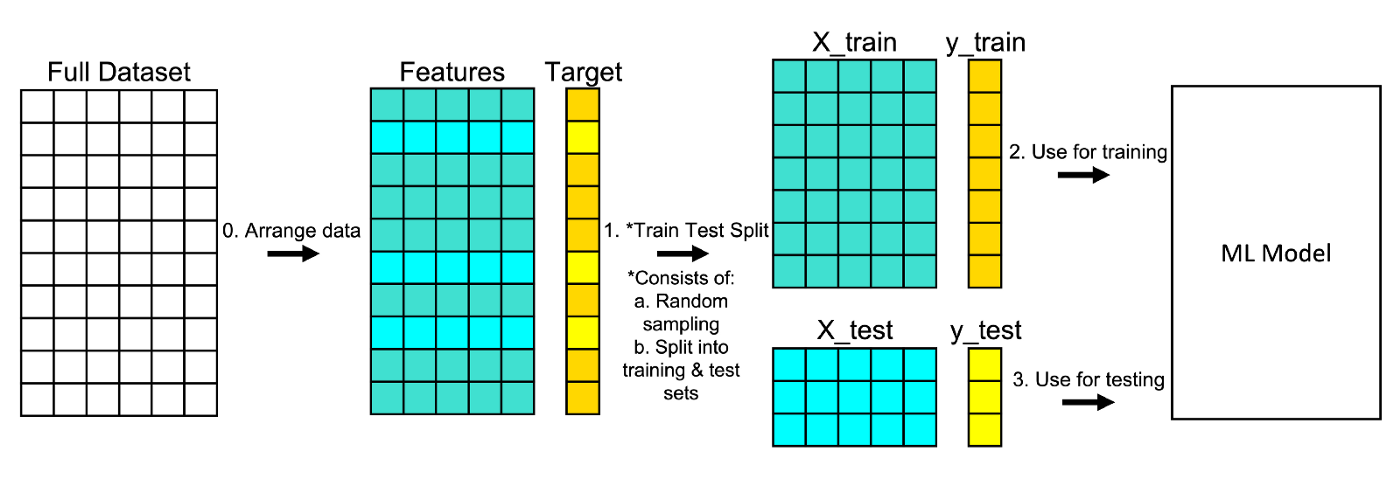

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (4, 1), (4,)
Test dataset size: (2, 1), (2,)


**Кроссвалидация**

Это метод, используемый для обучения и оценки модели машинного обучения с использованием нескольких частей набора данных. Это означает, что вместо того, чтобы разбивать набор данных только на две части, одну для обучения и другую для тестирования, набор данных делится на большее количество подвыборок.

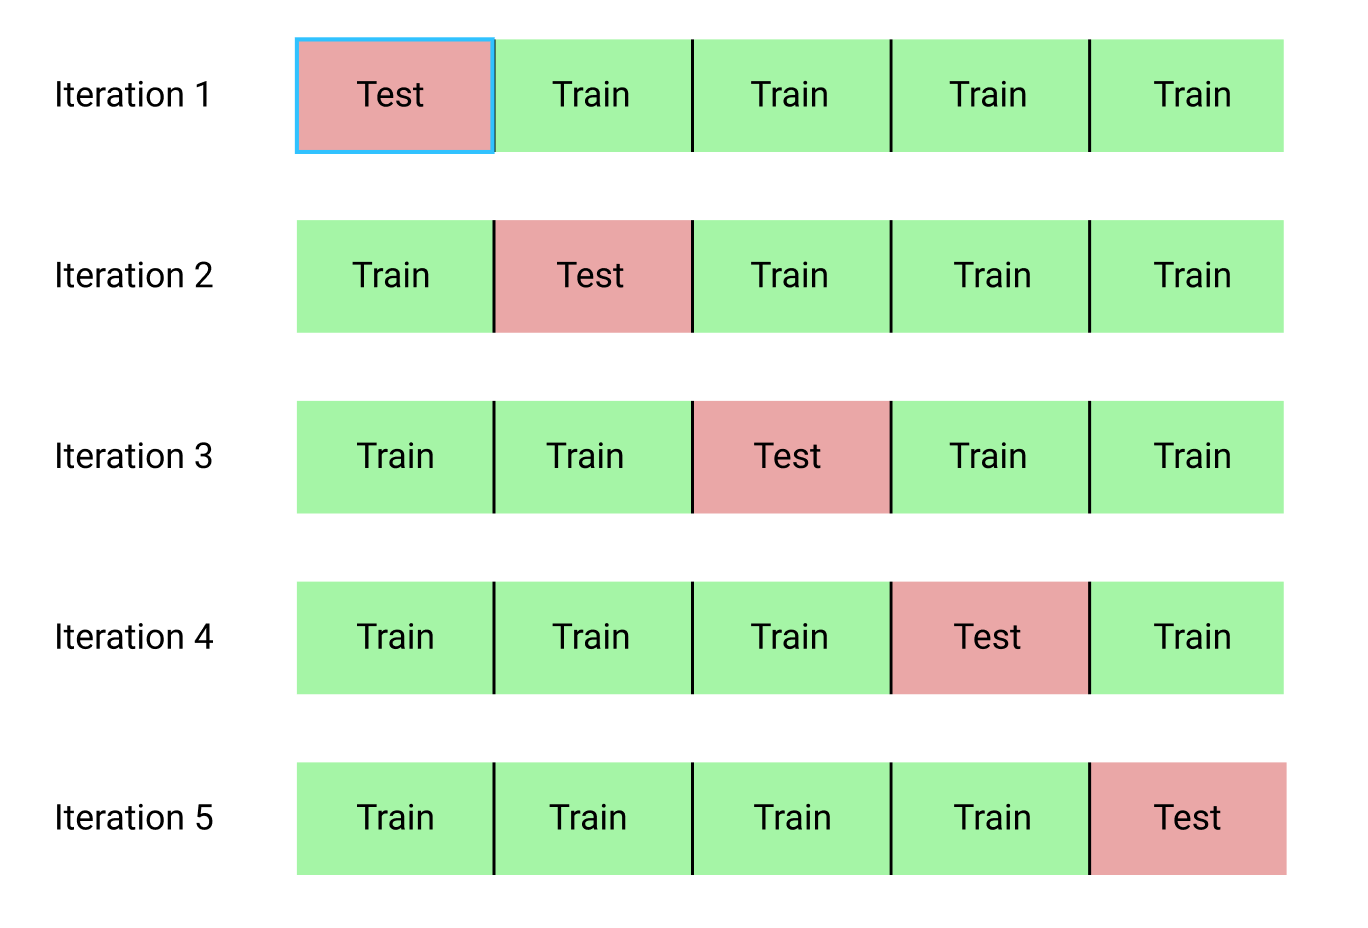

Выборка разбивается на k непересекающихся подмножеств, и каждое из них по очереди выступает в качестве контрольной выборки (а остальные k − 1 частей — в качестве обучающей выборки). В качестве результата выдается средняя ошибка по всем контрольным выборкам.

Значение k должно быть тщательно выбрано для выборки данных.

Плохо выбранное значение для k может привести к неправильному представлению о качестве модели, например, к оценке с высокой дисперсией (которая может сильно измениться на основе данных, используемых в соответствии с моделью), или к высокой предвзятости (например, переоценка качества модели).

k выбирают обычно 5 или 10, но нет формального правила. По мере того как k становится больше, разница в размере между тестовой выборкой и подмножествами resampling становится мала. По мере уменьшения этой разницы предвзятость к технике становится меньше.


**В библиотеки sklearn также реализован метод кросс валидации:**

```
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
```

Конструктор выглядит следующим образом:

`sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)`

где:
- estimator - модель машинного обучения
- X - вектор признаков
- y - вектор целевой переменной
- scoring - оценка модели
- cv - количество фолдов (подвыборок)

### Визуализация данных

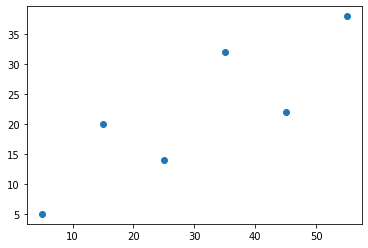

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()

### Создание и обучение модели

In [11]:
# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression

model = LinearRegression()

In [12]:
# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д, 
# используя существующие вход и выход (x и y) в качестве аргументов. 

model.fit(X_train, y_train)

LinearRegression()

In [13]:
w0 = model.intercept_
w0

8.17142857142857

In [14]:
w1 = model.coef_
w1

array([0.54857143])

$$ y = w_{0} + w_{1}x $$
$$ y = 8.17 + 0.55*x $$

In [16]:
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [0.54857143]
Свободный коэффицент уравнения w0: 8.17142857142857


Проверим результаты прямыми вычислениями

In [ ]:
np.linalg.inv(x.T@x)@x.T@y

array([0.68181818])

In [ ]:
x1 = np.array([[1, 5], [1, 15], [1, 25], [1, 35], [1, 45], [1, 55]])
x1

array([[ 1,  5],
       [ 1, 15],
       [ 1, 25],
       [ 1, 35],
       [ 1, 45],
       [ 1, 55]])

In [ ]:
np.linalg.inv(x1.T@x1)@x1.T@y

array([5.63333333, 0.54      ])

### Предсказание, оценка и визуализация результата

In [20]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 8.385714285714288
Mean Squared Error: 76.42816326530617
R2 score: -0.05782924934679823


*Если $R2<0$, то выходит, что  Это значит, что разработанная вами модель даёт прогноз даже хуже, чем простое усреднение.*

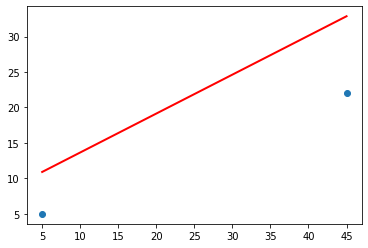

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.show()

### Пример того, почему регрессия "Линейная"

In [ ]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
y = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16])

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model1.predict(x)

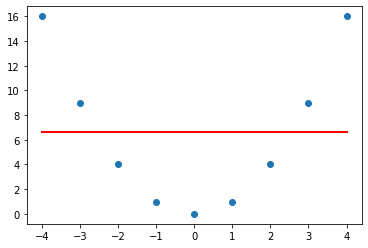

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

# Задание

Применим полученные навыки для анализа данных о ценах на недвижимость в Бостоне, опубликованных в статье 1978 г. Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США.

Подробнее о наборе данных: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Ваша задача:
1. Построить модель линейной регрессии
2. Получить коэффиценты уравнения линейной регрессии
3. Написать уравнение линейной регрессии
4. Визуализировать данные и полученное уравнение линейной регрессии
5. Посчитать в ручную MSE (расчеты привести в ноутбуке)
6. Посчитать MSE, MAE, R2 с использованием встроенных методов библиотеки sklearn и сделать вывод по полученным метрикам.

In [1]:
# Данный набор встроен в библиотеку Sickit-learn как обучающий
# Его можно загрузить из библиотеки Sklearn и посмотреть описание датасета

from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
import numpy as np
import pandas as pd

columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

df

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
